# Bike

In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error
import pickle

In [5]:
df = pd.read_csv("bike.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df.shape

(10886, 12)

In [7]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
fig = px.histogram(df, x = ["temp", "atemp"])
fig.show()

In [10]:
fig = px.histogram(df, x = ["humidity"])
fig.show()

In [11]:
fig = px.histogram(df, x = ["count", "casual", "registered"])
fig.show()

In [12]:
fig = px.box(df, x=["count"])
fig.show()

In [13]:
df["count_log"] = np.log1p(df["count"])

In [14]:
fig = px.histogram(df, x = ["count_log"])
fig.show()

In [15]:
fig = px.box(df, x=["count_log"])
fig.show()

In [16]:
df["season_sin"] = np.sin(2 * np.pi * df["season"] / 4)
df["season_cos"] = np.cos(2 * np.pi * df["season"] / 4)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_log,season_sin,season_cos
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2.833213,1.0,6.123234e-17
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,3.713572,1.0,6.123234e-17
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,3.496508,1.0,6.123234e-17
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2.639057,1.0,6.123234e-17
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0.693147,1.0,6.123234e-17


<Axes: >

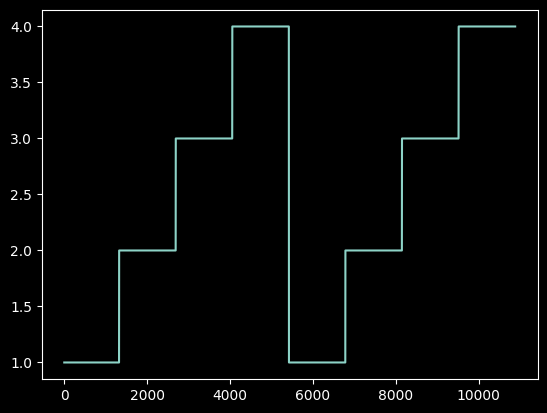

In [17]:
df["season"].plot()

<Axes: >

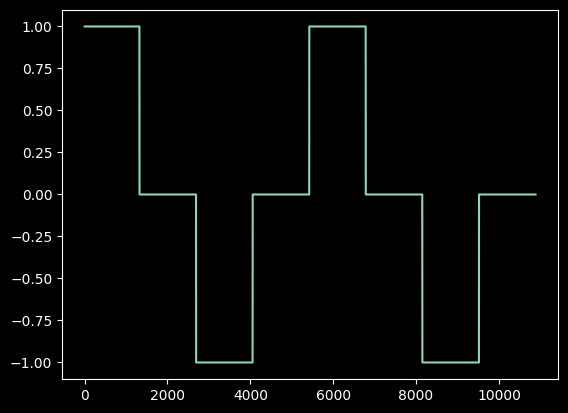

In [18]:
df["season_sin"].plot()

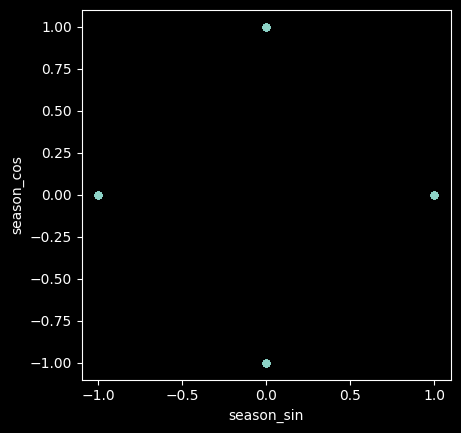

In [19]:
df.plot.scatter('season_sin', 'season_cos').set_aspect("equal")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  count_log   10886 non-null  float64
 13  season_sin  10886 non-null  float64
 14  season_cos  10886 non-null  float64
dtypes: float64(6), int64(8), object(1)
memory usage: 1.2+ MB


In [21]:
# 2011-01-01 00:00:00
df["new_datetime"] = pd.to_datetime(df["datetime"],
                                    format="%Y-%m-%d %H:%M:%S")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_log,season_sin,season_cos,new_datetime
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2.833213,1.0,6.123234e-17,2011-01-01 00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,3.713572,1.0,6.123234e-17,2011-01-01 01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,3.496508,1.0,6.123234e-17,2011-01-01 02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2.639057,1.0,6.123234e-17,2011-01-01 03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0.693147,1.0,6.123234e-17,2011-01-01 04:00:00


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  object        
 1   season        10886 non-null  int64         
 2   holiday       10886 non-null  int64         
 3   workingday    10886 non-null  int64         
 4   weather       10886 non-null  int64         
 5   temp          10886 non-null  float64       
 6   atemp         10886 non-null  float64       
 7   humidity      10886 non-null  int64         
 8   windspeed     10886 non-null  float64       
 9   casual        10886 non-null  int64         
 10  registered    10886 non-null  int64         
 11  count         10886 non-null  int64         
 12  count_log     10886 non-null  float64       
 13  season_sin    10886 non-null  float64       
 14  season_cos    10886 non-null  float64       
 15  new_datetime  10886 non-null  dateti

In [23]:
df["year"] = df["new_datetime"].dt.year
df["month"] = df["new_datetime"].dt.month
df["day"] = df["new_datetime"].dt.day
df["weekday"] = df["new_datetime"].dt.weekday
df["hour"] = df["new_datetime"].dt.hour

df.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,count_log,season_sin,season_cos,new_datetime,year,month,day,weekday,hour
8575,2012-07-18 16:00:00,3,0,1,1,30.34,34.850,66,16.9979,34,...,224,5.416100,-1.000000e+00,-1.836970e-16,2012-07-18 16:00:00,2012,7,18,2,16
4757,2011-11-11 07:00:00,4,1,0,1,11.48,13.635,45,16.9979,5,...,121,4.804021,-2.449294e-16,1.000000e+00,2011-11-11 07:00:00,2011,11,11,4,7
9042,2012-08-19 03:00:00,3,0,0,2,25.42,30.305,61,11.0014,21,...,55,4.025352,-1.000000e+00,-1.836970e-16,2012-08-19 03:00:00,2012,8,19,6,3
8619,2012-08-01 12:00:00,3,0,1,1,32.80,37.120,49,7.0015,75,...,284,5.652489,-1.000000e+00,-1.836970e-16,2012-08-01 12:00:00,2012,8,1,2,12
4399,2011-10-15 08:00:00,4,0,0,1,18.86,22.725,59,19.0012,24,...,125,4.836282,-2.449294e-16,1.000000e+00,2011-10-15 08:00:00,2011,10,15,5,8
5408,2011-12-19 10:00:00,4,0,1,1,9.84,11.365,67,12.9980,12,...,108,4.691348,-2.449294e-16,1.000000e+00,2011-12-19 10:00:00,2011,12,19,0,10
6951,2012-04-07 23:00:00,2,0,0,1,18.86,22.725,23,15.0013,32,...,118,4.779123,1.224647e-16,-1.000000e+00,2012-04-07 23:00:00,2012,4,7,5,23
3968,2011-09-16 09:00:00,3,0,1,1,18.86,22.725,55,16.9979,21,...,210,5.351858,-1.000000e+00,-1.836970e-16,2011-09-16 09:00:00,2011,9,16,4,9
5730,2012-01-13 22:00:00,1,0,1,1,8.20,9.090,47,22.0028,7,...,65,4.189655,1.000000e+00,6.123234e-17,2012-01-13 22:00:00,2012,1,13,4,22
6529,2012-03-09 07:00:00,1,0,1,2,15.58,19.695,40,19.9995,6,...,268,5.594711,1.000000e+00,6.123234e-17,2012-03-09 07:00:00,2012,3,9,4,7


In [24]:
df["month"].unique().shape

(12,)

In [25]:
df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12)
df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12)

In [26]:
df["day"].unique().shape

(19,)

In [27]:
df["day_sin"] = np.sin(2 * np.pi * df["day"] / 19)
df["day_cos"] = np.cos(2 * np.pi * df["day"] / 19)

In [28]:
df["weekday"].unique().shape

(7,)

In [29]:
df["weekday_sin"] = np.sin(2 * np.pi * df["weekday"] / 7)
df["weekday_cos"] = np.cos(2 * np.pi * df["weekday"] / 7)

In [30]:
df["hour"].unique().shape

(24,)

In [31]:
df["hour_sin"] = np.sin(2 * np.pi * df["hour"] / 24)
df["hour_cos"] = np.cos(2 * np.pi * df["hour"] / 24)

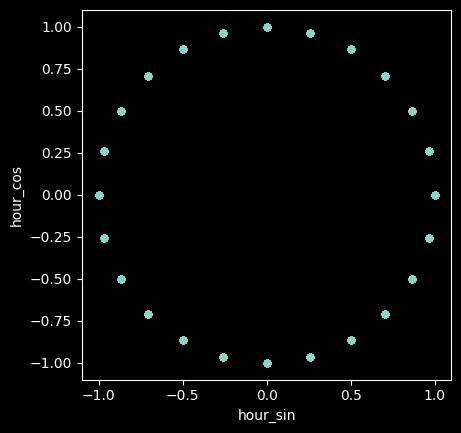

In [32]:
df.plot.scatter("hour_sin", "hour_cos").set_aspect("equal")

In [33]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,weekday,hour,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,hour_sin,hour_cos
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,5,0,0.5,0.866025,0.324699,0.945817,-0.974928,-0.222521,0.000000,1.000000
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,5,1,0.5,0.866025,0.324699,0.945817,-0.974928,-0.222521,0.258819,0.965926
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,5,2,0.5,0.866025,0.324699,0.945817,-0.974928,-0.222521,0.500000,0.866025
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,5,3,0.5,0.866025,0.324699,0.945817,-0.974928,-0.222521,0.707107,0.707107
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,5,4,0.5,0.866025,0.324699,0.945817,-0.974928,-0.222521,0.866025,0.500000


## Scaling

In [34]:
features_to_scale = ["weather", "temp", "atemp", "humidity", "windspeed"]

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,weekday,hour,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,hour_sin,hour_cos
0,2011-01-01 00:00:00,1,0,0,-0.660178,-1.333661,-1.092737,0.993213,-1.567754,3,...,5,0,0.5,0.866025,0.324699,0.945817,-0.974928,-0.222521,0.000000,1.000000
1,2011-01-01 01:00:00,1,0,0,-0.660178,-1.438907,-1.182421,0.941249,-1.567754,8,...,5,1,0.5,0.866025,0.324699,0.945817,-0.974928,-0.222521,0.258819,0.965926
2,2011-01-01 02:00:00,1,0,0,-0.660178,-1.438907,-1.182421,0.941249,-1.567754,5,...,5,2,0.5,0.866025,0.324699,0.945817,-0.974928,-0.222521,0.500000,0.866025
3,2011-01-01 03:00:00,1,0,0,-0.660178,-1.333661,-1.092737,0.681430,-1.567754,3,...,5,3,0.5,0.866025,0.324699,0.945817,-0.974928,-0.222521,0.707107,0.707107
4,2011-01-01 04:00:00,1,0,0,-0.660178,-1.333661,-1.092737,0.681430,-1.567754,0,...,5,4,0.5,0.866025,0.324699,0.945817,-0.974928,-0.222521,0.866025,0.500000


## Train/Test Split

In [35]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'count_log', 'season_sin', 'season_cos', 'new_datetime', 'year',
       'month', 'day', 'weekday', 'hour', 'month_sin', 'month_cos', 'day_sin',
       'day_cos', 'weekday_sin', 'weekday_cos', 'hour_sin', 'hour_cos'],
      dtype='object')

In [36]:
X = df.drop(columns=['datetime', 'season', "casual", "registered", "count", "count_log",
                     "new_datetime", "year", "month", "day", "weekday", "hour"])
y = df["count_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Train Shape: {X_train.shape}")
print(f"Test Shape: {X_test.shape}")

Train Shape: (8708, 17)
Test Shape: (2178, 17)


In [38]:
X_train.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_sin,season_cos,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,hour_sin,hour_cos
2815,0,1,-0.660178,0.981763,0.963502,1.097141,-0.832442,-1.000000e+00,-1.836970e-16,-0.500000,-0.866025,9.157733e-01,-0.401695,0.974928,-0.222521,0.965926,0.258819
8695,0,0,-0.660178,2.139474,2.036168,-1.189268,0.881916,-1.000000e+00,-1.836970e-16,-0.866025,-0.500000,9.694003e-01,0.245485,-0.974928,-0.222521,-0.866025,-0.500000
8406,0,1,-0.660178,1.613242,1.410151,-1.085341,0.514260,-1.000000e+00,-1.836970e-16,-0.500000,-0.866025,-4.759474e-01,-0.879474,0.974928,-0.222521,-0.707107,-0.707107
1543,0,0,0.917583,-0.702182,-0.646088,1.616779,-0.710164,1.224647e-16,-1.000000e+00,0.866025,-0.500000,-1.645946e-01,-0.986361,-0.781831,0.623490,0.866025,0.500000
4952,0,0,-0.660178,-0.912675,-1.003643,-0.877485,0.514260,-2.449294e-16,1.000000e+00,-0.500000,0.866025,-2.449294e-16,1.000000,-0.974928,-0.222521,0.500000,-0.866025


## Training

In [39]:
model = MLPRegressor(random_state=42,
                     max_iter=1000,
                     hidden_layer_sizes=(100, 50, ),
                     n_iter_no_change=50,
                     early_stopping=True,
                     verbose=False)
model.fit(X_train, y_train)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(100, 50), max_iter=1000,
             n_iter_no_change=50, random_state=42)

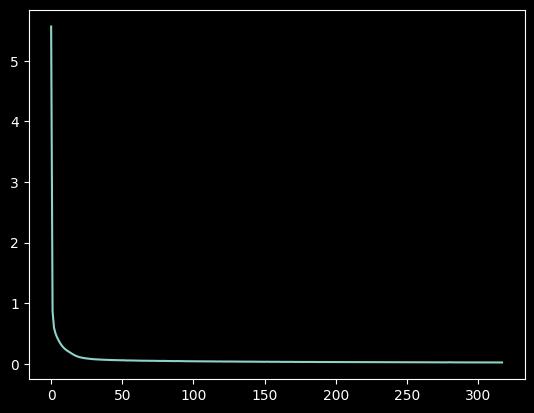

In [40]:
loss_curve = model.loss_curve_
plt.plot(loss_curve)
plt.show()

## Evaluation Metrics

In [41]:
predictions = model.predict(X_test)

y_test = np.expm1(y_test)
predictions = np.expm1(predictions)

In [42]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
me = (predictions - y_test).mean()

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("ME:", me)

MAE: 35.91284710807836
MSE: 3388.7370319137917
RMSE: 58.2128596781999
MAPE: 0.2980702136996544
ME: -1.7294317085544708


In [43]:
errors = predictions - y_test

fig = px.histogram(errors)
fig.show()

## Export

In [44]:
pickle.dump(scaler, open("bike-scaler.pkl", "wb"))
pickle.dump(model, open("bike-model.pkl", "wb"))